<a href="https://colab.research.google.com/github/anderaguiar/K-MEANS-NA-UNHA/blob/main/ML_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho de Machine Learning – Aprendizado não supervisionado.**

Aluno: Anderson Roberto de Aguiar RA:942211289

Para responder a pergunta se existe alguma relação de idade/limites no cartão de crédito, busquei no kaggle uma base de dados bem completa com informações de clientes e filtrei as colunas idade e limite para que seja feita está análise, irei separar em três categorias para que fique visualmente mais fácil a compreenção das informações geradas através do plots. Link kaggle: https://www.kaggle.com/sakshigoyal7/credit-card-customers?select=BankChurners.csv

Para que seja feita a clusterização utilizei o algoritmo k-means; O k-means irá calcular a distancia média entre os centroides, fazendo com que haja uma iteração até que os centroides não mais se movam, o k-means é um algoritmo simples com uma capacidade de clusterizar esse tipo de conjunto de dados com muita rapidez e eficiência.

In [ ]:
# bibliotecas
import numpy as np
import pandas as pd
from numpy import random
import seaborn as sb

In [ ]:
# carrega o arquivo BankChurners.csv em um data frame
df = pd.read_csv('BankChurners.csv')
# exibe o data frame df
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
# extrai as colunas Idade e Limite do df
df_extract = pd.DataFrame(df, columns=['Customer_Age', 'Credit_Limit'])
# exibe o data frame df_extract
df_extract

,Customer_Age,Credit_Limit
0,45,12691.0
1,49,8256.0
2,51,3418.0
3,40,3313.0
4,40,4716.0
...,...,...
10122,50,4003.0
10123,41,4277.0
10124,44,5409.0
10125,30,5281.0


In [ ]:
# função para retornar os centroids, entrar com o data frame e a quantidade de classificadores
def centerK(df, k):
  while True:
    center_index = [random.randint(0, len(df)) for i in range(k)]

    if len(set(center_index)) == k:
      break

  centers = [df.loc[i][df.columns].values for i in center_index]

  return centers

In [ ]:
# função para calcular a distancia media entre os centroids, retorna o data frame com a clusterização, entrar com o data frame e os centroides
def kmeans(df, centers):
  max_dist = 10000.0
  k = len(centers)
  df_np = df.values

  while max_dist > 1.0:
    dists = [np.linalg.norm(centers[i] - df_np, axis=1) for i in range(k)]
    temp_centers = [np.mean(df_np[np.argmin(dists, axis=0) == i], axis=0) for i in range(k)]
    max_dist = max([np.linalg.norm(centers[i] - temp_centers[i], axis=0) for i in range(k)])
    centers = temp_centers
    clusters_ids = [np.argmin(dists, axis=0)]
 
  df['ClusterID'] = [clusters_ids[0][i] for i in range(len(clusters_ids[0]))]
  return df

In [ ]:
# define a quantidade de classificadores
k = 3

In [ ]:
# chama a função centerK, entrar com o data frame tranformado e a quantidade de classificadores
cent = centerK(df_extract, k)
# exibe o retorno da função 
cent

[array([  53., 4753.]), array([  44., 6329.]), array([  57., 1551.])]

In [ ]:
# chama a função kmeans
df_ret = kmeans(df_extract, cent)
# exibe o retorno da função
df_ret

,Customer_Age,Credit_Limit,ClusterID
0,45,12691.0,0
1,49,8256.0,2
2,51,3418.0,2
3,40,3313.0,2
4,40,4716.0,2
...,...,...,...
10122,50,4003.0,2
10123,41,4277.0,2
10124,44,5409.0,2
10125,30,5281.0,2


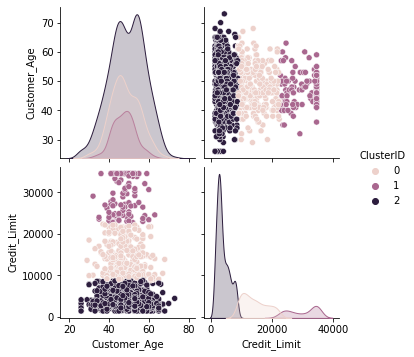

In [ ]:
# plot do resultado obitido em k-means
sb.pairplot(df_ret.head(1000), hue="ClusterID")